<h3 style="color:#D198B7 ">Boot up Engine for all required libraries - Python & Custom</h3>

In [51]:
%run Engine.ipynb

['feature_fraction', 'lambda_l1', 'lambda_l2', 'learning_rate', 'max_depth', 'min_data_in_leaf', 'min_gain_to_split', 'min_sum_hessian_in_leaf', 'num_leaves']


<h3 style="color:#98D1B2 ">Set WD & Read in File</h3>

In [2]:
file_path_dg = ("C:/Users/alexz/OneDrive/Documents/D_G/")

In [3]:
# Prevent pandas DFs from making chained copies of DFs (when changes are made to the data frame)
pd.options.mode.chained_assignment = None 

In [4]:
df = pd.read_csv(file_path_dg + "train_test.csv")

<h3 style="color:#98D1B2 ">Data First Glance Inspection</h3>

In [5]:
display(df)

,Claims_Amount,Claims_Count,Purchase_Date,Purchase_Price,Sale_Flag,Period_of_Cover,Premium,Plan_Flag,Age,Price_Diff,Cover_Start_Date,Plan_Count,PriceTest,Account,Category
0,0.00,0,2021-11-06,450.00,0,12,40.56,0,18.0,0.220217,2021-11-24,0,1,0,12
1,0.00,0,2021-12-10 00:00:00,437.02,1,12,45.36,0,0.0,0.148936,2021-12-10 00:00:00,0,1,14,1
2,0.00,0,2021-11-22,279.48,0,12,36.24,0,7.0,-0.082067,2021-11-29,0,1,14,15
3,0.00,0,2021-10-20 00:00:00,400.00,0,12,56.52,0,7.0,0.165842,2021-10-27 00:00:00,0,1,14,9
4,0.00,0,2021-04-16 00:00:00,700.00,1,12,61.32,0,180.0,-0.057196,2021-10-13 00:00:00,0,1,29,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,155.38,1,2021-10-29,480.29,0,12,39.48,0,0.0,0.000000,2021-10-29,0,0,14,1
1996,0.00,0,2021-09-17,599.00,0,12,33.24,0,87.0,0.000000,2021-12-13,0,0,0,12
1997,0.00,0,2021-11-26 00:00:00,363.83,1,12,39.48,1,0.0,0.000000,2021-11-26 00:00:00,1,0,2,1
1998,0.00,0,2021-10-19,299.00,0,12,51.36,0,17.0,0.000000,2021-11-05,0,0,6,18


In [6]:
null_value_stats = df.isnull().sum()
null_value_stats[null_value_stats != 0]

Series([], dtype: int64)

In [7]:
df.agg({'Age': ['min', 'max', 'mean', 'count']})

,Age
min,0.0000
max,823.0000
mean,53.8795
count,2000.0000


<h3 style="color:#98D1B2 ">EDA - Create a Profile</h3>

In [8]:
# Create a data profile report
dg_df_profile = ProfileReport(df)
dg_df_profile.to_file(file_path_dg + "d_g_data_profile.html")

<h3 style="color:#98D1B2 ">Plan of Action from EDA</h3>

* Drop Ridiculous Ages - keep adult age brackets rather than impute as no DOB or additional data to improve - future remove & flag for investigation
** Change date formats to maintain consistency
** Why & where are the outliers - claims
* Investigate the data based on findings from the profile further
* Learn more about the data
* Obviously not a full data set
** Feature Enrichment
**** Postcode
**** DOB
**** LOB
**** Profile of Sale & claims history by segment

* Age as a float

<h3 style="color:#98D1B2 ">Feature Engineering (low key)</h3>

In [9]:
# Only model rows with Age in a decent range - between 18 & 80 for this excercise
# Without further discussion I could create an arbitrary address to add to the model
#    - this would be more for analysis post modeling to see where the risks where by area or region

In [10]:
df['Age'] = df['Age'].apply(np.int64)

In [11]:
df = df[ (df['Age'] > 18) & (df['Age'] < 80)]

In [12]:
df.agg({'Age': ['min', 'max', 'mean', 'count']})

,Age
min,19.000000
max,79.000000
mean,37.869018
count,397.000000


In [13]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
df['Cover_Start_Date'] = pd.to_datetime(df['Cover_Start_Date'])

<h3 style="color:#98D1B2 ">Elasticity</h3>

* Price Elasticity of Demand = Percentage Change in Quantity Demanded / Percentage Change in Price
* If the PED is greater than one (PED > 1), it is known as "elastic", meaning changes in price causes a significant change in demand.
* If the PED is equal to 1 (PED = 1), then this means any change in price causes equivalent changes in demand.
* If the PED is less than one (PED < 1), it is known as “inelastic”. This means changes in price don’t affect the demand that much.
* If the PED is equal to 0 (PED = 0), known as “perfectly inelastic”, meaning any change in price doesn’t cause a change in demand.

In [14]:
#number of plans the customer has
df['Plan_Count'].unique()

array([0, 4, 2, 1, 3, 6, 7, 5], dtype=int64)

In [15]:
 #flag whether the customer has or has had a plan with D+G
df['Plan_Flag'].unique()

array([0, 1], dtype=int64)

<h3 style="color:#98D1B2 ">Feature Engineering (low key)</h3>

In [142]:
#check the distribution of the target variable
df['Sale_Flag'].value_counts()

0    1575
1     425
Name: Sale_Flag, dtype: int64

In [18]:
# Add weight to the model - can be done in LGM hyperparameter section

In [19]:
df = pd.read_csv(file_path_dg + "train_test.csv")

In [20]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
df['Cover_Start_Date'] = pd.to_datetime(df['Cover_Start_Date'])

In [21]:
# Check Profile - . 0.27 sales - add weighting - past experience - other options cause more issues & Don't always result in an imporoved model (Upsampling - Downsampling etc)
425 / 1575 

0.2698412698412698

<h3 style="color:#98D1B2 ">For this Excercise Drop the Dates for convinence</h3>

In [22]:
df2 = df.drop(columns=['Purchase_Date', 'Cover_Start_Date'])

In [43]:
df2.shape

(2000, 13)

In [38]:
flat_df = df2.loc[df2['PriceTest'] == 0]
random_df = df2.loc[df2['PriceTest'] == 1]

In [41]:
flat_df.shape

(1000, 13)

In [42]:
random_df.shape

(1000, 13)

In [39]:
display(flat_df)

,Claims_Amount,Claims_Count,Purchase_Price,Sale_Flag,Period_of_Cover,Premium,Plan_Flag,Age,Price_Diff,Plan_Count,PriceTest,Account,Category
1000,0.00,0,300.00,0,12,37.08,0,1.0,0.0,0,0,9,15
1001,0.00,0,360.00,0,12,37.08,1,0.0,0.0,1,0,4,8
1002,0.00,0,289.99,0,12,48.48,0,32.0,0.0,0,0,7,9
1003,0.00,0,359.99,0,12,63.84,0,7.0,0.0,0,0,13,21
1004,0.00,0,229.99,0,12,33.24,0,2.0,0.0,0,0,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,155.38,1,480.29,0,12,39.48,0,0.0,0.0,0,0,14,1
1996,0.00,0,599.00,0,12,33.24,0,87.0,0.0,0,0,0,12
1997,0.00,0,363.83,1,12,39.48,1,0.0,0.0,1,0,2,1
1998,0.00,0,299.00,0,12,51.36,0,17.0,0.0,0,0,6,18


<h3 style="color:#98D1B2 ">Create Train, Test & Validation splits</h3>

In [23]:
X_train, X_valid_train, X_test = train_validate_test_split(df2)

In [24]:
y_train = X_train['Sale_Flag'].values
y_test =  X_test['Sale_Flag'].values
y_valid_train = X_test['Sale_Flag'].values

In [25]:
bayesian_tr_index, bayesian_val_index = list(StratifiedKFold(2, random_state=12, shuffle=True).split(X_valid_train, y_valid_train))[0]

In [26]:
predictors = X_train.columns.tolist()

In [45]:
%%capture
init_points = 3
n_iter = 3

optimizer.maximize(init_points = init_points, n_iter = n_iter);

In [28]:
nfold = 5
import gc
gc.collect()
skf2 = StratifiedKFold(n_splits = nfold, shuffle = True, random_state=68)

In [29]:
train_index, val_index = list(StratifiedKFold(2, random_state=12, shuffle=True).split(X_train, y_train))[0]

In [30]:
optimized_lgb_params = {
        'num_leaves': int(optimizer.max["params"]["num_leaves"]),
        'max_bin': 63,
        'min_data_in_leaf': int(optimizer.max["params"]["min_data_in_leaf"]),
        'learning_rate': optimizer.max["params"]["learning_rate"],
        'min_sum_hessian_in_leaf': optimizer.max["params"]["min_sum_hessian_in_leaf"],
        'bagging_fraction': 1.0,
        'bagging_freq': 5,
        'feature_fraction': optimizer.max["params"]["feature_fraction"],
        'lambda_l1': optimizer.max["params"]["lambda_l1"],
        'lambda_l2': optimizer.max["params"]["lambda_l2"],
        'min_gain_to_split': optimizer.max["params"]["min_gain_to_split"],
        'max_depth': int(optimizer.max["params"]["max_depth"]),
        'save_binary': True, 
        'seed': 1337,
        'feature_fraction_seed': 1337,
        'bagging_seed': 1337,
        'drop_seed': 1337,
        'data_random_seed': 1337,
        'objective': 'regression',
        'boosting_type': 'gbdt',
        'verbose': 1,
        'metric': 'rmse',
        'is_unbalance': True,
        'boost_from_average': False, 
    }

In [46]:
%%capture
# prediction with 1 time of prediction.
predictions = np.zeros((len(y_test), nfold))


train_set_lgb = lgb.Dataset(X_train.iloc[train_index][predictors].values,
                            label= y_train[train_index],
                            feature_name= predictors,
                            free_raw_data=False)
    
val_set_lgb = lgb.Dataset(X_train.iloc[val_index][predictors].values,
                            label= y_train[val_index],
                            feature_name= predictors,
                            free_raw_data=False)
clf = lgb.train(optimized_lgb_params, train_set_lgb, 5000, valid_sets = [val_set_lgb],
                verbose_eval=250, early_stopping_rounds = 50)
    
predictions = clf.predict(X_test[predictors], num_iteration=clf.best_iteration)

In [32]:
final = predictions.clip(0,20)

In [127]:
X = df
y = X[['Sale_Flag']]
X = X.drop(columns=['Purchase_Date', 'Cover_Start_Date', 'Sale_Flag'])

In [129]:
# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)

In [130]:
params = {
    "max_bin": 512,
    "learning_rate": 0.1,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 2,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

model = lgb.train(params, d_train, 20000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[93]	valid_0's binary_logloss: 0.468343


In [131]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [132]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X.iloc[0,:])

In [133]:
shap.force_plot(explainer.expected_value[1], shap_values[1][:1000,:], X.iloc[:1000,:])

In [ ]:
# DF, based on which importance is checked
X_importance = X
display(X_importance)

In [ ]:
# Explain model predictions using shap library:
explainer = shap.TreeExplainer(model_ind)
shap_values = explainer.shap_values(X_importance)

In [144]:
explainer

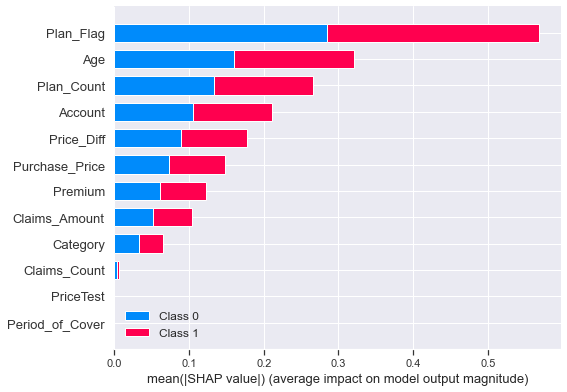

In [135]:
shap.summary_plot(shap_values, X_importance)

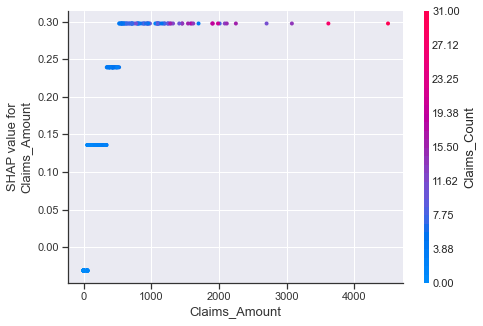

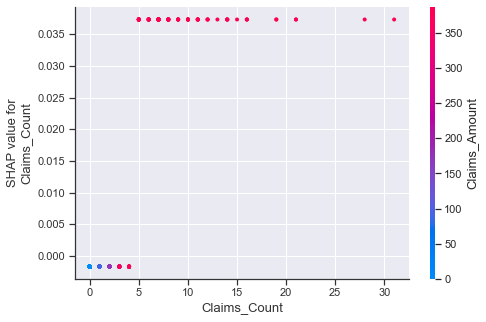

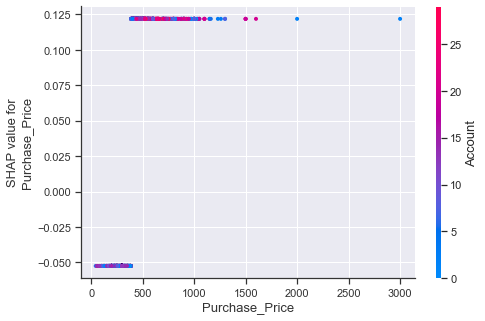

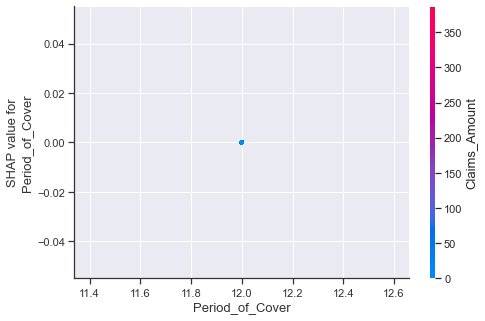

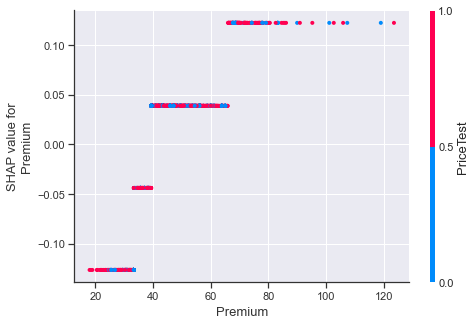

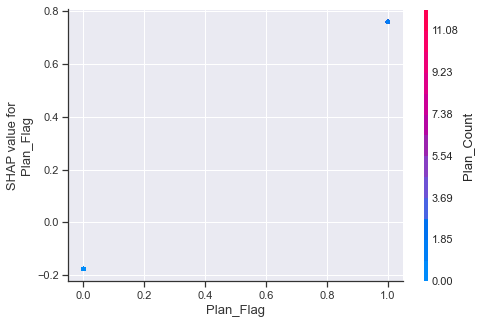

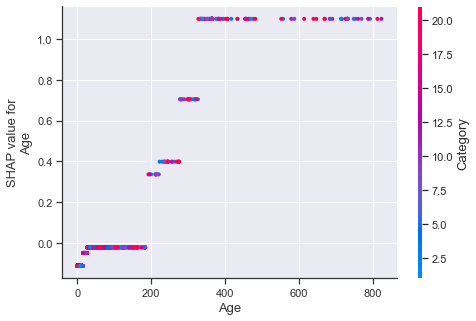

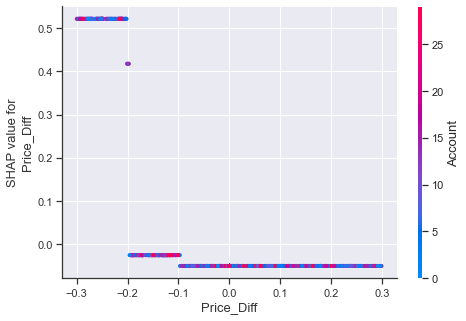

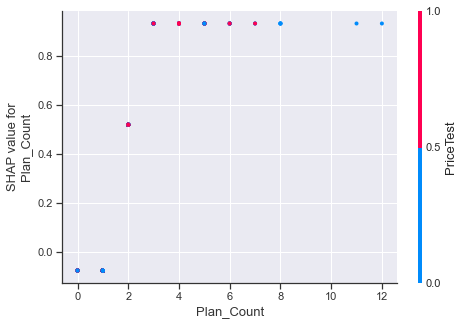

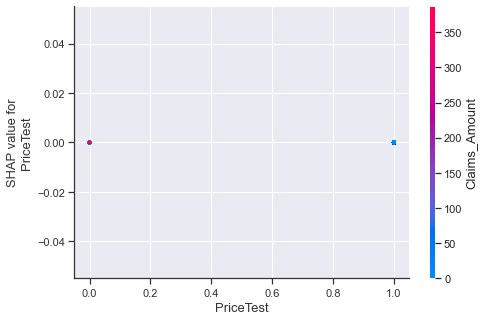

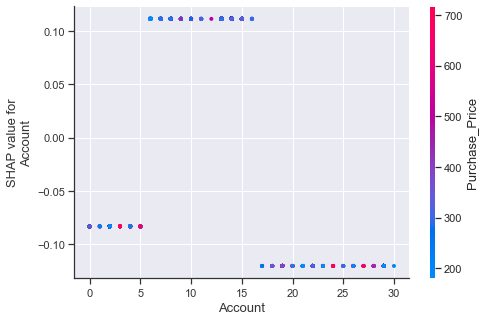

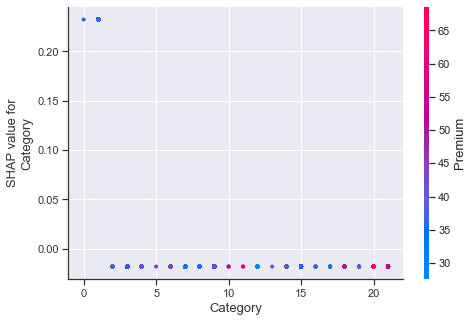

In [138]:
X_display = X
for name in X_train.columns:
    shap.dependence_plot(name, shap_values[1], X, display_features=X_display)

In [ ]:
# Pre Training Elasticity
# Needs investigation
df["Pct_Change_in_Sales"] = df["Sale_Flag"].pct_change()
df["Pct_Change_in_Price"] = df["Purchase_Price"].pct_change()
df["Price_Elasticity"] = df["Pct_Change_in_Price"] / df["Pct_Change_in_Price"]

display(df)

In [139]:
predictions

array([ 1.60170879e-02,  9.84898531e-02,  1.04955017e+00,  2.71957656e-04,
        9.46008497e-01,  1.19350465e-02, -2.01055093e-02,  9.79135434e-01,
        2.43885363e-02,  9.64908209e-01,  1.10199695e-02,  9.43665484e-01,
        1.32309553e-02, -8.28110665e-03,  8.67250646e-03,  4.69338319e-02,
        9.72360557e-01,  2.26592613e-02, -4.43721574e-03,  5.95300180e-03,
       -1.82986873e-02, -9.09991993e-03, -4.16636968e-03,  3.04519964e-02,
        2.26642045e-02, -3.39697658e-02,  8.54050301e-02,  1.71980677e-02,
        7.17187880e-02,  8.30045771e-02,  5.25700111e-03, -2.93920901e-03,
        6.47944670e-02,  1.06955389e+00, -8.82447957e-03,  9.11581576e-01,
        9.94262063e-01,  1.04494144e+00,  2.44029788e-02, -3.17545887e-02,
       -1.19977710e-02,  5.68047135e-02, -1.19116804e-02,  9.72006178e-01,
       -1.43281515e-02, -4.73340161e-02,  9.93764154e-01, -4.15364703e-03,
        9.68312002e-01,  9.77285198e-01, -2.95719020e-02,  1.03526991e+00,
        9.49193872e-01,  

[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[10]	training's l2: 22.2652	valid_0's l2: 24.808
[20]	training's l2: 10.6162	valid_0's l2: 13.5743
[30]	training's l2: 7.32664	valid_0's l2: 11.2404
[40]	training's l2: 5.66644	valid_0's l2: 10.8586
[50]	training's l2: 4.59117	valid_0's l2: 11.1469
[60]	training's l2: 3.80117	valid_0's l2: 11.0713
[70]	training's l2: 3.21471	valid_0's l2: 10.9395
[80]	training's l2: 2.80289	valid_0's l2: 10.907
[90]	training's l2: 2.40915	valid_0's l2: 10.955
[100]	training's l2: 2.11657	valid_0's l2: 10.8267


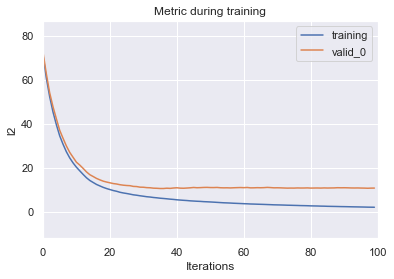

In [143]:
X, y = sklearn.datasets.load_boston(return_X_y=True)
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X, y, random_state=7054)

model = lgb.LGBMRegressor(objective='mse', seed=8798, num_threads=1)
model.fit(X_train, y_train, eval_set=[(X_val, y_val), (X_train, y_train)], verbose=10)

lgb.plot_metric(model)

In [ ]:
flat_df = df2.loc[df2['PriceTest'] == 0]
random_df = df2.loc[df2['PriceTest'] == 1]

flat_df_X = flat_df
flat_df_flat_df_y = flat_df_X[['Sale_Flag']]
flat_df_X = flat_df_X.drop(columns=['Purchase_Date', 'Cover_Start_Date', 'Sale_Flag'])

# create a train/test split
flat_df_X_train, flat_df_X_test, flat_df_y_train, flat_df_y_test = train_test_split(flat_df_X, flat_df_y, test_size=0.2, random_state=7)
d_train = lgb.Dataset(flat_df_X_train, label=flat_df_y_train)
d_test = lgb.Dataset(flat_df_X_test, label=flat_df_y_test)



In [145]:
24.26+

43.42